In [1]:
import numpy as np
from exploration_strategies import StrategyHandler
from rl_envs_forge.envs.k_armed_bandit.k_armed_bandit import KArmedBandit
import seaborn as sns
import matplotlib.pyplot as plt

# Stationary K-Armed Bandit

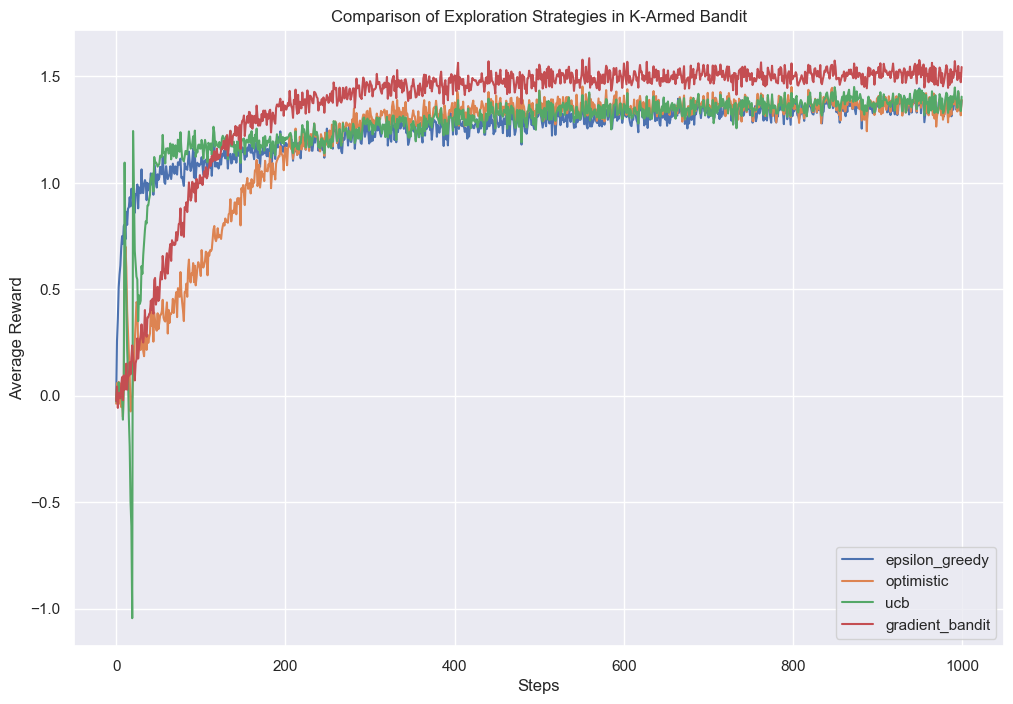

In [2]:
num_arms = 10
num_steps = 1000
num_runs = 1000  # Number of runs for averaging

epsilon = 0.1  # For epsilon-greedy
initial_value = 5  # For optimistic initial values
c = 2  # For UCB

def run_experiment(strategy, strategy_params):
    rewards = np.zeros((num_runs, num_steps))
    for run in range(num_runs):
        env = KArmedBandit(k=num_arms, seed=run)  # Assuming KArmedBandit is correctly defined elsewhere
        handler = StrategyHandler(strategy=strategy, num_arms=num_arms, **strategy_params)
        for step in range(num_steps):
            action = handler.select_action(step)
            _, reward, _, _, _ = env.step(action)
            handler.update(action, reward)
            rewards[run, step] = reward
    return rewards

average_rewards = {}
average_rewards['epsilon_greedy'] = np.mean(run_experiment('epsilon_greedy', {'epsilon': epsilon}), axis=0)
average_rewards['optimistic'] = np.mean(run_experiment('optimistic', {'initial_value': initial_value}), axis=0)
average_rewards['ucb'] = np.mean(run_experiment('ucb', {'c': c}), axis=0)
average_rewards['gradient_bandit'] = np.mean(run_experiment('gradient_bandit', {}), axis=0)


plt.figure(figsize=(12, 8))
for strategy, rewards in average_rewards.items():
    plt.plot(rewards, label=strategy)

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Exploration Strategies in K-Armed Bandit')
plt.legend()
plt.show()

# Shifting distribution for arm 0

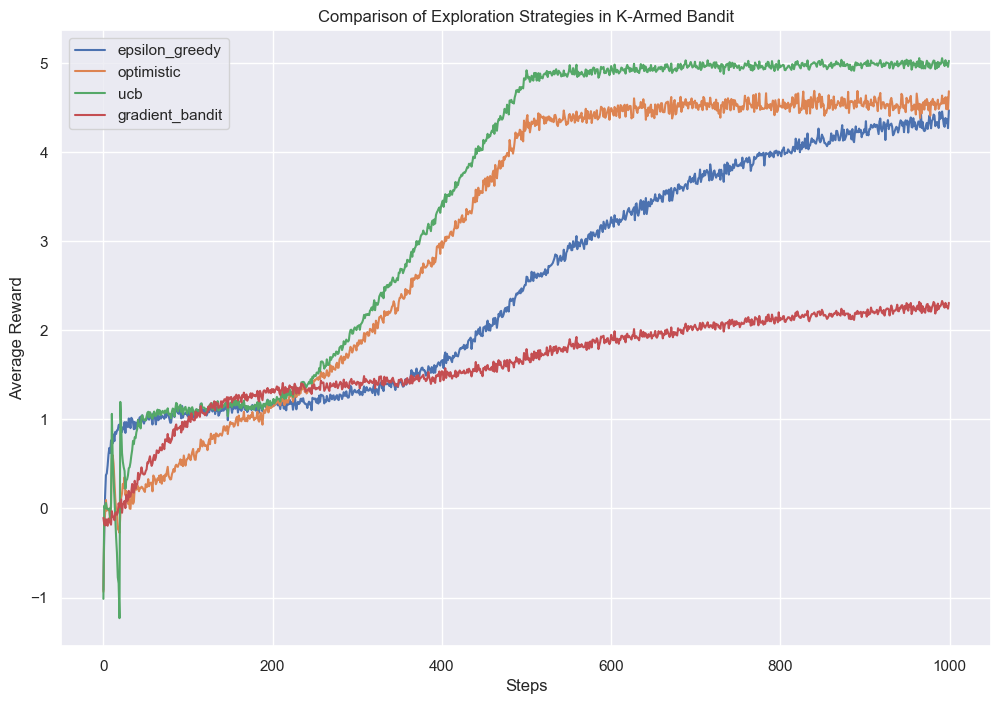

In [3]:
num_arms = 10
num_steps = 1000
num_runs = 1000  # Number of runs for averaging

epsilon = 0.1  # For epsilon-greedy
initial_value = 5  # For optimistic initial values
c = 2  # For UCB

def shift_mean(timestep, start_mean=-1, end_mean=6, shift_step=500):
    # Linear shift from start_mean to end_mean around shift_step
    if timestep < shift_step:
        return start_mean + (end_mean - start_mean) * (timestep / shift_step)
    else:
        return end_mean
    
arm_params = {
    0: {  # Arm 0 will have a shifting distribution
        "distribution": "normal",
        "mean": -1,  # Start with a mean of -1
        "std": 1,
        "param_functions": [
            {
                "function": lambda timestep: shift_mean(timestep),
                "target_param": "mean"
            }
        ]
    }
}

def run_experiment(strategy, strategy_params):
    rewards = np.zeros((num_runs, num_steps))
    for run in range(num_runs):
        env = KArmedBandit(k=num_arms, seed=run, arm_params=arm_params)  # Assuming KArmedBandit is correctly defined elsewhere
        handler = StrategyHandler(strategy=strategy, num_arms=num_arms, **strategy_params)
        for step in range(num_steps):
            action = handler.select_action(step)
            _, reward, _, _, _ = env.step(action)
            handler.update(action, reward)
            rewards[run, step] = reward
    return rewards

average_rewards = {}
average_rewards['epsilon_greedy'] = np.mean(run_experiment('epsilon_greedy', {'epsilon': epsilon}), axis=0)
average_rewards['optimistic'] = np.mean(run_experiment('optimistic', {'initial_value': initial_value}), axis=0)
average_rewards['ucb'] = np.mean(run_experiment('ucb', {'c': c}), axis=0)
average_rewards['gradient_bandit'] = np.mean(run_experiment('gradient_bandit', {}), axis=0)


plt.figure(figsize=(12, 8))
for strategy, rewards in average_rewards.items():
    plt.plot(rewards, label=strategy)

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Exploration Strategies in K-Armed Bandit')
plt.legend()
plt.show()